<a href="https://colab.research.google.com/github/ia4226/CNN_digitrecog/blob/main/CNN_digitrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 : Import necessary dependencies



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


Step 2 : PreProcess

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


Step 3: Reshape

In [8]:

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

Shape 4: One-hot encode the labels

In [9]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Step 5 : Build the CNN model

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

Step 6 : Compile the model

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Step 7 : Train the model

In [12]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 14s 5ms/step - loss: 0.2176 - accuracy: 0.9330 - val_loss: 0.0672 - val_accuracy: 0.9806
Epoch 2/5
750/750 [==============================] - 3s 5ms/step - loss: 0.0597 - accuracy: 0.9813 - val_loss: 0.0490 - val_accuracy: 0.9856
Epoch 3/5
750/750 [==============================] - 4s 6ms/step - loss: 0.0420 - accuracy: 0.9871 - val_loss: 0.0441 - val_accuracy: 0.9868
Epoch 4/5
750/750 [==============================] - 3s 5ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0544 - val_accuracy: 0.9828
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0361 - val_accuracy: 0.9897


Step 8 : Evaluate the model on the test set

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0348 - accuracy: 0.9881
Test accuracy: 0.988099992275238


Step 9 : predictions

In [14]:
predictions = model.predict(test_images[:5])
predicted_labels = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 223ms/step


Step 10 : Visualize

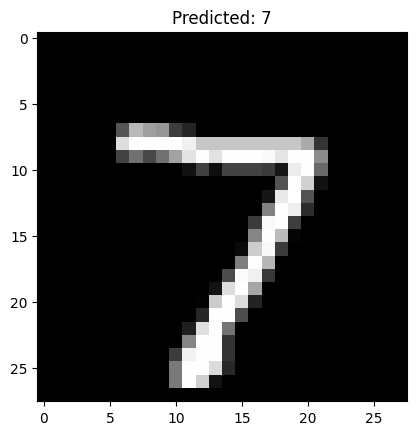

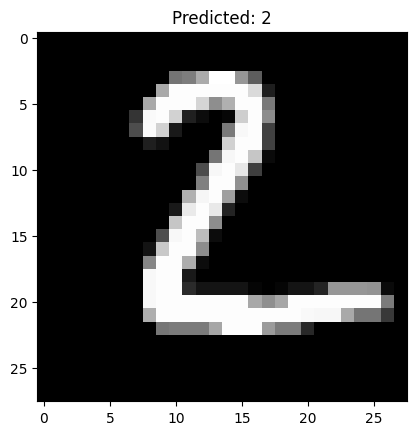

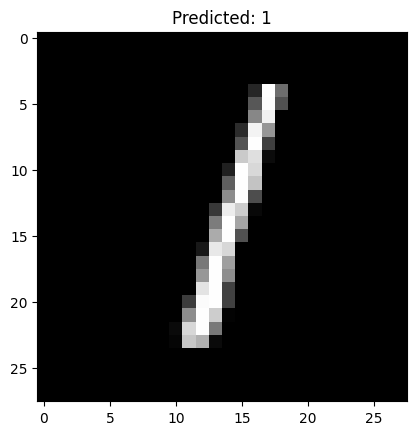

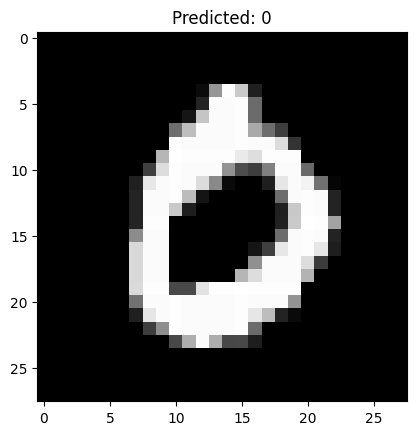

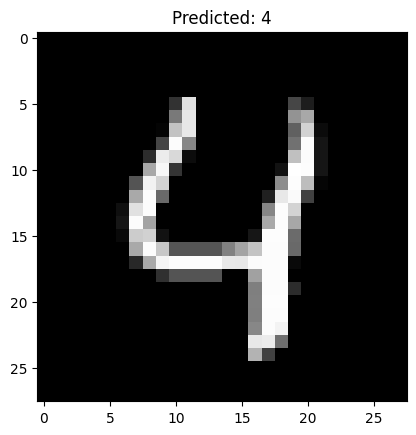

In [15]:
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}')
    plt.show()

Detailed Explaination :

1. Import necessary dependencies:
The code begins by importing essential libraries, including NumPy for numerical operations, Matplotlib for plotting, and TensorFlow with Keras for deep learning. These libraries provide tools for handling data, creating neural network models, and visualizing results.
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


2. PreProcess:
The MNIST dataset, consisting of handwritten digit images and their corresponding labels, is loaded into training and testing sets. This dataset is a standard benchmark for digit recognition tasks. The training and testing images are then reshaped to have a single channel (grayscale) and normalized to ensure pixel values range between 0 and 1.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


3. Reshape:
The images in the dataset are reshaped to conform to the input requirements of the neural network model. Additionally, pixel values are normalized, which involves scaling them to a range between 0 and 1. This normalization helps in training the neural network more effectively.
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


4. One-hot encode the labels:
The digit labels, representing numbers from 0 to 9, are converted into one-hot encoded vectors. This encoding is a way to represent categorical data numerically, with each digit corresponding to a unique vector. It facilitates the training of the neural network for a multi-class classification task.
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


5. Build the CNN model:
The Convolutional Neural Network (CNN) model is constructed using the Sequential API from Keras. The model consists of convolutional layers, max-pooling layers, and dense layers. These layers are designed to capture hierarchical features in the input images, leading to effective digit recognition.
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


6. Compile:
The CNN model is compiled with specific configurations for training. The Adam optimizer is chosen for optimization, categorical cross-entropy is set as the loss function suitable for multi-class classification, and accuracy is selected as the evaluation metric to monitor during training.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


7. Train:
The compiled model is trained on the training set. The training process involves iteratively adjusting the model's parameters based on the training data, with the goal of minimizing the chosen loss function. In this case, the training is performed for a specified number of epochs (iterations through the entire training set).
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


8. Evaluate:
The trained model is evaluated on a separate test set to assess its performance on unseen data. The evaluation includes calculating the loss and accuracy metrics. This step provides insights into how well the model generalizes to new, unseen examples.
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


9. predictions:
The trained model is used to make predictions on a subset of test images. The predictions are probabilities associated with each digit class. The argmax function is applied to obtain the predicted digit labels from these probability distributions.
predictions = model.predict(test_images[:5])
predicted_labels = np.argmax(predictions, axis=1)


10. Visualize:
The final step involves visualizing the results. For a few selected test images, the model's predictions are displayed alongside the actual images. This visualization provides a qualitative assessment of how well the model performs in recognizing handwritten digits. Each image is shown in grayscale, and the predicted digit label is presented for comparison.

for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}')
    plt.show()

